<a href="https://colab.research.google.com/github/kcomt/Musical-Recommendation-System/blob/master/Trabajo_Final_Inteligencia_Articial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empezando
Como base del proyecto, se eligió este dataset: https://data.world/typhon/billboard-hot-100-songs-2000-2018-w-spotify-data-lyrics. 

Básicamente, el dataset, consiste del top canciones de billboard entre el año 2000 y 2018. Este dataset justo tenia las columnas que nos interesaban como título de canción, nombre de artista, fecha de relevancia, letra de la canción y otras columnas que ayudan identificar el género de una canción, como energía, índice de instrumentos, etc.

In [ ]:
import pandas as pd
from google.colab import files
import io
subido = files.upload()

Saving lyrics.csv to lyrics.csv


In [ ]:
from google.colab import data_table
pima = pd.read_csv(io.BytesIO(subido['lyrics.csv']), encoding = 'latin-1')
data_table.DataTable(pima)

# Creando el Corpus
Para crear el corpus inicial se itero por cada fila del dataset y se agregó la letra, si tuviera, a un arreglo, que luego sería guardado en un archivo llamado corpus.txt


In [ ]:
from bs4 import BeautifulSoup
import csv
corpus = ""
with open('lyrics.csv', 'r', errors="ignore") as file:
    line = 1
    reader = csv.reader(file)
    songs = []
    for row in reader:
        if line != 0 and line < 5000:
            if line != 1 and row[29] != "unknown":
                corpus = corpus + row[30]
            line += 1
        else:
            break

textFile = open("corpus.txt", "w")
n = textFile.write(str(corpus))
textFile.close()

# Creando los Tokens
Para crear los tokens, se hizo 4 pasos:

1.   Paso 1: Se creo los tokens iniciales utilizando la función word_tokenize
2.   Paso 2: Se elimino todas las stopwords
3.   Paso 3: Se encontro y elimino nuestras stopwords custom
4.   Paso 4: Se hallo y elimino todas las palabras que son sinonimos para nuestro contexto



**Paso 1:**

In [ ]:
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
from nltk.tokenize import word_tokenize

tokens = word_tokenize(corpus, "english")
tokens = [word.lower() for word in tokens if word.isalpha()]
textFile = open("tokens1.txt", "w")
n = textFile.write(str(tokens))
textFile.close()

**Paso 2:**

In [ ]:
from nltk.corpus import stopwords
tokens2 = tokens[:]
for token in tokens2:
    if token in stopwords.words('english'):
        cleanTokens.remove(token)
textFile = open("tokens2.txt", "w")
n = textFile.write(str(tokens2))
textFile.close()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords

textFile = open("tokens2.txt", "r" , encoding = 'latin-1')
tokens2 = textFile.read().split(',')
for i in range(len(tokens2)):
    tokens2[i] = tokens2[i].replace(" ", "")
    tokens2[i] = tokens2[i].replace("'", "")
    tokens2[i] = tokens2[i].replace("[", "")
    tokens2[i] = tokens2[i].replace("]", "")

freq = nltk.FreqDist(tokens2)
sns.set()
freq.plot(30, cumulative=False)

**Paso 3**

In [ ]:
ownStopWords = ["got", "nah", "na", "ca", "way",
                "ai", "want", "wan", "see", "get", "gets", "even", "oh", "ya", "yeah", "woah", "like", "go", "make", "take", "fuck","hm","mhm","mmm", "let", "tell", "know", "ta", "back",
                 "never", "like", "hey", "ooh", "come", "say", "gon", "could", "wo", "said",
                 "ever", "every", "put", "out", "still", "good"]

textFile = open("tokens2.txt", "r", encoding='latin-1')
tokens3 = textFile.read().split(",")

for i in range(len(tokens3)):
    tokens3[i] = tokens3[i].replace(" ", "")
    tokens3[i] = tokens3[i].replace("'", "")
    tokens3[i] = tokens3[i].replace("[", "")
    tokens3[i] = tokens3[i].replace("]", "")

cleanTokensCustom = tokens3[:]
for token in tokens3:
    if token in ownStopWords:
        cleanTokensCustom.remove(token)


textFile = open("creatingBagOfWords/tokens3.txt", "w")
n = textFile.write(str(tokens3))
textFile.close()

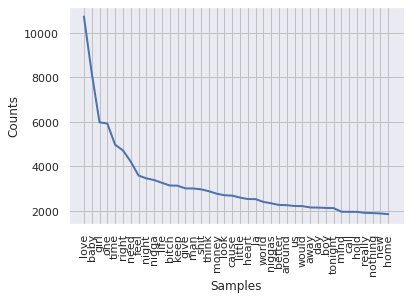

747630


In [ ]:
textFile = open("tokens3.txt", "r" , encoding = 'latin-1')
tokens3 = textFile.read().split(',')
for i in range(len(tokens3)):
    tokens3[i] = tokens3[i].replace(" ", "")
    tokens3[i] = tokens3[i].replace("'", "")
    tokens3[i] = tokens3[i].replace("[", "")
    tokens3[i] = tokens3[i].replace("]", "")

freq = nltk.FreqDist(tokens3)
sns.set()
freq.plot(40, cumulative=False)
print(len(tokens3))

**Paso 4**

In [ ]:
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

textFile = open("tokens3.txt", "r", encoding='latin-1')
tokens3 = textFile.read().split(",")

for i in range(len(tokens3)):
    tokens3[i] = tokens3[i].replace(" ", "")
    tokens3[i] = tokens3[i].replace("'", "")
    tokens3[i] = tokens3[i].replace("[", "")
    tokens3[i] = tokens3[i].replace("]", "")

equivalence = ["butterflies", "sweetheart", "feelings", "lovegame", "husband", "madonna",
               "showty", "shorty", "fiance", "heart", "crush", "chick", "love", "baby", "girl", "bae", "we"]
rootEquivalence = "love"

equivalence2 = ["billionare", "millionare", "pavements", "magazine", "maserati", "hustling", "foreign", "bitches", "streets", "picasso", "hustler", "versace", "clothes", "million",
                "swagin", "stacks", "commas", "winner", "hustla", "money", "gucci", "shiny", "racks", "spend", "livin", "drive", "broke", "bens", "benz", "whip", "cars", "drip", "hoes", "swag",
                "rari", "rich", "flex", "star", "car", "mil"]
rootEquivalence2 = "success"

equivalence3 = ["disappointing", "heartbreaker", "disappointed", "expectation", "heartbreak", "pretending", "solitude", "jealousy", "jealous", "heart", "alone",
                "call", "exes", "us", "ex"]
rootEquivalence3 = "heart"

equivalence4 = ["misunderstood", "bittersweet", "goosebumps", "addiction", "addicted", "feelings", "sadness", "misread", "sadness", "crying", "sorrow", "regret",
                "stuck", "agony", "call", "cuts", "numb", "void", "sad", "cry"]
rootEquivalence4 = "feelings"

equivalence5 = ["backwood", "partying", "partiyin", "alcohol", "tonight", "cocaine", "bottles", "dance", "booze", "drugs", "percs", "xanny", "joint", "club",
                "xans", "boof", "weed", "kush", "lean", "boof", "high", "lsd", "gas", "og"]
rootEquivalence5 = "party"

equivalence6 = ["seduction", "slippery", "lollipop", "cocaine", "coochie", "sensual", "bedroom", "kissing", "naughty", "mouths", "slutty", "exotic", "tottie", "kinky",
                "lumps", "thong", "brain", "xanny", "freak", "jeans", "thicc", "thick", "boobs", "head", "slut", "lean", "sexy", "kiss", "thot", "lips", "neck", "sex", "cum", "wet",
                "ass", "bed"]
rootEquivalence6 = "kinky"

equivalence7 = ["hardest", "fistful", "villian", "niggas", "bodied", "bullet", "fight", "cruel", "bully", "ak-47", "smoke", "beam", "guns", "boys", "slap", "fire",
                "lava", "heat", "hood", "gang", "uzi", "gun", "hit"]
rootEquivalence7 = "danger"

equivalence8 = ["compliment", "butterfly", "brighter", "kindness", "sweetest", "lullaby", "unicorn", "smiles", "joyful", "summer", "spring", "sweet", "happy",
                "honey", "child", "joy"]
rootEquivalence8 = "sweet"

tokens4 = tokens3[:]
for sin in equivalence:
    tokens4 = [w.lower().replace(sin, rootEquivalence) for w in tokens4]

tokens5 = tokens4[:]
for sin in equivalence2:
    tokens5 = [w.lower().replace(sin, rootEquivalence2) for w in tokens5]

tokens6 = tokens5[:]
for sin in equivalence3:
    tokens6 = [w.lower().replace(sin, rootEquivalence3) for w in tokens6]

tokens7 = tokens6[:]
for sin in equivalence4:
    tokens7 = [w.lower().replace(sin, rootEquivalence4) for w in tokens7]

tokens8 = tokens7[:]
for sin in equivalence5:
    tokens8 = [w.lower().replace(sin, rootEquivalence5) for w in tokens8]

tokens9 = tokens8[:]
for sin in equivalence6:
    tokens9 = [w.lower().replace(sin, rootEquivalence6) for w in tokens9]

tokens10 = tokens9[:]
for sin in equivalence7:
    tokens10 = [w.lower().replace(sin, rootEquivalence7) for w in tokens10]

tokens11 = tokens10[:]
for sin in equivalence8:
    tokens11 = [w.lower().replace(sin, rootEquivalence8) for w in tokens11]

textFile = open("tokens4.txt", "w")
n = textFile.write(str(tokens11))
textFile.close()

#Aplicando derivación regresiva
Se eligió derivación regresiva sobre lematización, debido a que no nos interesa tanto que palabras “reales” se están utilizando en la letra, si no como estas en el contexto de la canción para formar algún tipo de sentimiento.


In [ ]:
from nltk.stem import SnowballStemmer
import nltk

textFile = open("tokens4.txt", "r", encoding='latin-1')
tokens4 = textFile.read().split(",")

for i in range(len(tokens4)):
    tokens4[i] = tokens4[i].replace(" ", "")
    tokens4[i] = tokens4[i].replace("'", "")
    tokens4[i] = tokens4[i].replace("[", "")
    tokens4[i] = tokens4[i].replace("]", "")

stemmer = SnowballStemmer('english')
tokens5 = [stemmer.stem(t) for t in tokens4]

ownStopWords = ["big", "mind", "suck", "crazy", "everyth", "gave",
                "better", "cool", "play", "boo", "time", "dunk", "drench", "free", "la", "right", "ay", "stay", "stop","damn","told","face","look","man","find"]

cont = 0
cleanTokens5 = tokens5[:]
for token in tokens5:
    print(cont)
    cont += 1
    if token in ownStopWords:
        cleanTokens5.remove(token)

mostFreqTokens = []
frecuencias = nltk.FreqDist(cleanTokens5)
for t, f in frecuencias.items():
    if f > 1000:
        mostFreqTokens.append(t)

textFile = open("tokens5.txt", "w")
n = textFile.write(str(mostFreqTokens))
textFile.close()


#Creando el Bag of Words
Para crear el bag of words, se va iterar el dataset original y transforma la entra de cada canción en tokens, para ver cuantos tokens incluye cada canción. Con esta información ya se podrá clasificar las canciones con una red neuronal.

In [ ]:
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import csv

textFile = open("creatingBagOfWords/tokens5.txt", "r", encoding='latin-1')
tokens5 = textFile.read().split(",")
textFile.close()

for i in range(len(tokens5)):
    tokens5[i] = tokens5[i].replace(" ", "")
    tokens5[i] = tokens5[i].replace("'", "")
    tokens5[i] = tokens5[i].replace("[", "")
    tokens5[i] = tokens5[i].replace("]", "")

with open('lyrics.csv', 'r', errors="ignore") as file:
    line = 1
    reader = csv.reader(file)
    songs = []
    idOfSong = 1
    for row in reader:
        if line != 0 and line < 5000:
            if line != 1 and row[29] != "unknown":
                song = []
                songTitle = row[2]
                artist = row[4]
                lyrics = row[30]
                song.append(idOfSong)
                song.append(songTitle)
                song.append(artist)
                song.append(lyrics)
                songs.append(song)
                idOfSong += 1
            line += 1
        else:
            break


def convertLyricsToTokens(lyrics):
    ownStopWords = ["got", "nah", "na", "ca", "way",
                    "ai", "want", "wan", "see", "get", "gets", "even", "oh", "ya", "yeah", "woah", "like", "go", "make", "take", "fuck", "hm", "mhm", "mmm", "let", "tell", "know", "ta", "back",
                    "never", "like", "hey", "ooh", "come", "say", "gon", "could", "wo", "said",
                    "ever", "every", "put", "out", "still", "good", "big", "mind", "suck", "crazy", "everyth", "gave",
                    "better", "cool", "play", "boo", "time", "dunk", "drench", "free", "la", "right", "ay", "stay", "stop"]

    equivalence = ["butterflies", "sweetheart", "feelings", "lovegame", "husband", "madonna",
                   "showty", "shorty", "fiance", "heart", "crush", "chick", "love", "baby", "girl", "bae", "we"]
    rootEquivalence = "love"
    equivalence2 = ["billionare", "millionare", "pavements", "magazine", "maserati", "hustling", "foreign", "bitches", "streets", "picasso", "hustler", "versace", "clothes", "million",
                    "swagin", "stacks", "commas", "winner", "hustla", "money", "gucci", "shiny", "racks", "spend", "livin", "drive", "broke", "bens", "benz", "whip", "cars", "drip", "hoes", "swag",
                    "rari", "rich", "flex", "star", "car", "mil"]
    rootEquivalence2 = "success"
    equivalence3 = ["disappointing", "heartbreaker", "disappointed", "expectation", "heartbreak", "pretending", "solitude", "jealousy", "jealous", "heart", "alone",
                    "call", "exes", "us", "ex"]
    rootEquivalence3 = "heart"
    equivalence4 = ["misunderstood", "bittersweet", "goosebumps", "addiction", "addicted", "feelings", "sadness", "misread", "sadness", "crying", "sorrow", "regret",
                    "stuck", "agony", "call", "cuts", "numb", "void", "sad", "cry"]
    rootEquivalence4 = "feelings"
    equivalence5 = ["backwood", "partying", "partiyin", "alcohol", "tonight", "cocaine", "bottles", "dance", "booze", "drugs", "percs", "xanny", "joint", "club",
                    "xans", "boof", "weed", "kush", "lean", "boof", "high", "lsd", "gas", "og"]
    rootEquivalence5 = "party"
    equivalence6 = ["seduction", "slippery", "lollipop", "cocaine", "coochie", "sensual", "bedroom", "kissing", "naughty", "mouths", "slutty", "exotic", "tottie", "kinky",
                    "lumps", "thong", "brain", "xanny", "freak", "jeans", "thicc", "thick", "boobs", "head", "slut", "lean", "sexy", "kiss", "thot", "lips", "neck", "sex", "cum", "wet",
                    "ass", "bed"]
    rootEquivalence6 = "kinky"
    equivalence7 = ["hardest", "fistful", "villian", "niggas", "bodied", "bullet", "fight", "cruel", "bully", "ak-47", "smoke", "beam", "guns", "boys", "slap", "fire",
                    "lava", "heat", "hood", "gang", "uzi", "gun", "hit"]
    rootEquivalence7 = "danger"
    equivalence8 = ["compliment", "butterfly", "brighter", "kindness", "sweetest", "lullaby", "unicorn", "smiles", "joyful", "summer", "spring", "sweet", "happy",
                    "honey", "child", "joy"]
    rootEquivalence8 = "sweet"

    tokens = word_tokenize(lyrics, "english")
    tokens = [word.lower() for word in tokens if word.isalpha()]

    tokens2 = tokens[:]
    for token in tokens:
        if token in stopwords.words('english'):
            tokens2.remove(token)

    tokens3 = tokens2[:]
    for token in tokens2:
        if token in ownStopWords:
            tokens3.remove(token)

    tokens4 = tokens3[:]
    for sin in equivalence:
        tokens4 = [w.lower().replace(sin, rootEquivalence) for w in tokens4]

    tokens5 = tokens4[:]
    for sin in equivalence2:
        tokens5 = [w.lower().replace(sin, rootEquivalence2) for w in tokens5]

    tokens6 = tokens5[:]
    for sin in equivalence3:
        tokens6 = [w.lower().replace(sin, rootEquivalence3) for w in tokens6]

    tokens7 = tokens6[:]
    for sin in equivalence4:
        tokens7 = [w.lower().replace(sin, rootEquivalence4) for w in tokens7]

    tokens8 = tokens7[:]
    for sin in equivalence5:
        tokens8 = [w.lower().replace(sin, rootEquivalence5) for w in tokens8]

    tokens9 = tokens8[:]
    for sin in equivalence6:
        tokens9 = [w.lower().replace(sin, rootEquivalence6) for w in tokens9]

    tokens10 = tokens9[:]
    for sin in equivalence7:
        tokens10 = [w.lower().replace(sin, rootEquivalence7) for w in tokens10]

    tokens11 = tokens10[:]
    for sin in equivalence8:
        tokens11 = [w.lower().replace(sin, rootEquivalence8) for w in tokens11]

    stemmer = SnowballStemmer('english')
    tokens12 = [stemmer.stem(t) for t in tokens11]

    return tokens12


with open("bagOfWords.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Title", "Artist", "kinki", "love", "success", "hard", "need", "feel", "day", "new", "gone", "heart", "boy", "realli", "real", "think",
                     "would", "thing", "one", "hold", "sdanger", "bitch", "leav", "danger", "around", "talk", "run", "keep", "nigga", "live", "sweet", "world", "alway", "successt", "eye",
                     "parti", "wait", "bodi", "made", "noth", "show", "bad", "turn", "long", "home", "light", "hand", "work", "nigparti", "caheart", "walk", "Emotion"])
    cont = 0
    for song in songs:
        dictAux = {}
        tokensAux = convertLyricsToTokens(song[3])
        for i in range(len(tokens5)):
            times = 0
            for j in range(len(tokensAux)):
                if tokensAux[j] == tokens5[i]:
                    times += 1
            dictAux.update({tokens5[i]: times})
        writer.writerow([song[1], song[2], dictAux.get("kinki"), dictAux.get("love"), dictAux.get("success"), dictAux.get("hard"), dictAux.get("need"), dictAux.get("feel"),
                         dictAux.get("day"), dictAux.get("new"), dictAux.get("gone"), dictAux.get(
            "heart"), dictAux.get("boy"), dictAux.get("realli"), dictAux.get("real"),
            dictAux.get("think"), dictAux.get("would"), dictAux.get("thing"), dictAux.get(
            "one"), dictAux.get("hold"), dictAux.get("sdanger"), dictAux.get("bitch"),
            dictAux.get("leav"), dictAux.get("danger"), dictAux.get("around"), dictAux.get(
            "talk"), dictAux.get("run"), dictAux.get("keep"), dictAux.get("nigga"),
            dictAux.get("live"), dictAux.get("sweet"), dictAux.get("world"), dictAux.get(
            "alway"), dictAux.get("successt"), dictAux.get("eye"), dictAux.get("parti"),
            dictAux.get("wait"), dictAux.get("bodi"), dictAux.get("made"), dictAux.get(
            "noth"), dictAux.get("show"), dictAux.get("bad"), dictAux.get("turn"),
            dictAux.get("long"), dictAux.get("home"), dictAux.get("light"), dictAux.get(
            "hand"), dictAux.get("work"), dictAux.get("nigparti"), dictAux.get("caheart"),
            dictAux.get("walk"), "c"])
        print(cont)
        cont += 1


#Creación de Data Set
Para la creación del dataset que será usado en la recomendación musical de emociones, se llenaron manualmente los primeros 100 valores del target del bagofwords, para después entrenar a la red neuronal para que clasifique al resto de las canciones.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import csv

neuralNetwork = MLPClassifier(hidden_layer_sizes=(2, 4), max_iter=2000,
                              learning_rate_init=0.07, activation='identity')

pima = pd.read_csv('bagOfWords.csv', sep=",", nrows=49)
x = pima.iloc[:, 2:51]
y = pima.iloc[:, 51]
standarizacion = StandardScaler().fit_transform(x)
xStandard = pd.DataFrame(data=standarizacion, columns=x.columns)
xStandard.head()
xTrain, xTest, yTrain, yTest = train_test_split(xStandard, y, test_size=0.01)
neuralNetwork.fit(xTrain, yTrain)

pima2 = pd.read_csv('bagOfWords.csv', sep=",", skiprows=49)
xpredict = pima2.iloc[:, 2:51]
ypredict = pima2.iloc[:, 51]
standarizacion = StandardScaler().fit_transform(xpredict)
xStandardPredict = pd.DataFrame(data=standarizacion, columns=xpredict.columns)
xStandardPredict.head()

df = pd.read_csv("bagOfWords.csv")

for i in range(len(xStandardPredict)):
    auxPredict = xStandardPredict.iloc[i]
    auxPredict = auxPredict.values.reshape(1, -1)
    df.at[i+49, "Emotion"] = neuralNetwork.predict(auxPredict)[0]

df.to_csv("dataSet.csv", index=False)
